In [1]:
import numpy as np
import ngboost
import shap
import matplotlib.pyplot as plt
import sklearn.tree as sk_tree

### Sample data:

In [2]:
n = 100
x1 = np.linspace(0, 10, n)
x2 = np.sqrt(x1)
X = np.array([x1,x2]).T
eps = np.random.normal(loc=0.0, scale=2, size=n)
y = x1 + 2*x2 + eps

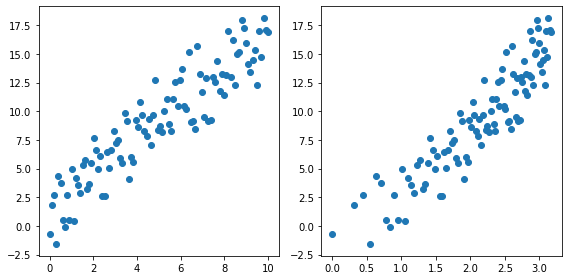

In [3]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(x1,y)
ax[1].scatter(x2,y)
plt.tight_layout()

### Train ngboost model:

In [4]:
ngb = ngboost.NGBRegressor(
    Base=sk_tree.DecisionTreeRegressor(criterion='friedman_mse', max_depth=4),
    n_estimators=100, learning_rate=0.01
)
model = ngb.fit(X=X, Y=y)

[iter 0] loss=2.9809 val_loss=0.0000 scale=1.0000 norm=3.9869


### Predict scale and location using ngboost model

In [5]:
y_pred_loc = model.predict(X=X)

In [6]:
y_pred_scale = model.pred_dist(X=X).params['scale']

In [7]:
y_pred_loc[:10]

array([1.38437789, 2.69378415, 2.69378415, 1.42124798, 3.77988086,
       3.77988086, 2.60911311, 2.60911311, 2.60911311, 2.60911311])

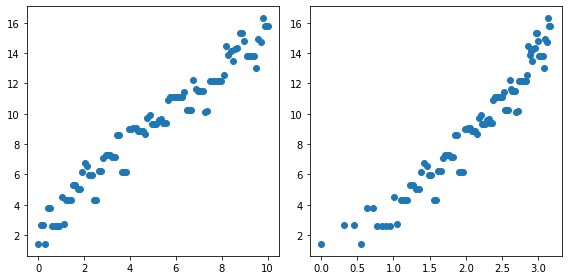

In [8]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(x1,y_pred_loc)
ax[1].scatter(x2,y_pred_loc)
plt.tight_layout()

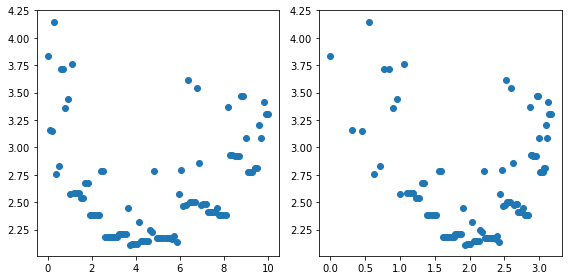

In [9]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(x1,y_pred_scale)
ax[1].scatter(x2,y_pred_scale)
plt.tight_layout()

### Shap explainer

In [16]:
tree_explainer = shap.TreeExplainer(model, model_output=0)
shap_loc_vals = tree_explainer.shap_values(X=X)

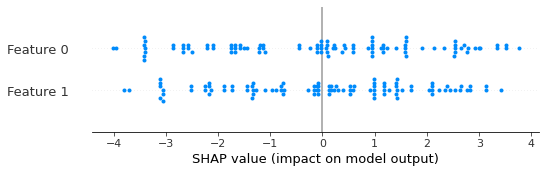

In [17]:
shap.summary_plot(shap_values=shap_loc_vals)

In [12]:
tree_explainer = shap.TreeExplainer(model, model_output=1)
shap_scale_vals = tree_explainer.shap_values(X=X)

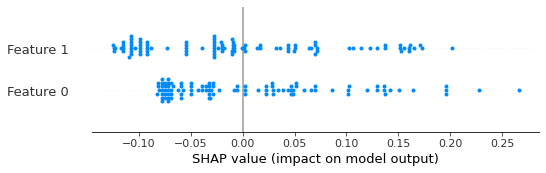

In [13]:
shap.summary_plot(shap_values=shap_scale_vals)

### Check if shap outputs sum up to $y_{\rm pred} - \bar y_{\rm pred}$:

`model_output=0` results satisfy expectation:

In [105]:
(y_pred_loc - y_pred_loc.mean()) / (shap_loc_vals.T[0]+shap_loc_vals.T[1])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

`model_output=1` results does not satisfy expectation:

In [106]:
(y_pred_scale - y_pred_scale.mean()) / (shap_scale_vals.T[0]+shap_scale_vals.T[1])

array([   2.84469387,    2.86212659,    2.76682814,    2.48631479,
          2.48631479,    2.48631479,    2.66408856,    2.62028451,
          2.23927703,    2.67739558,    2.67739558,    2.56887842,
          2.40250299,    2.59594971,    2.41435859,    4.35487886,
          2.69392889,    3.77188648,    2.92470581,    2.92470581,
          1.80874289,    2.78680476,    2.78680476,    2.78680476,
          2.14884315,    2.67701947,    2.67701947,    2.49542556,
          2.49542556,    2.49542556,    2.49542556,    2.49542556,
          2.80805181,    2.34235709,    2.34235709,    2.34235709,
          2.34235709,    2.34235709,    2.34235709,    2.34235709,
          2.34235709,    2.34235709,    2.34235709,    2.34235709,
          2.34235709,    2.67574241,    2.27434187,    2.27101351,
          2.2539322 ,    2.25727878,    2.25527756, -105.75770835,
          3.4133777 ,    3.4133777 ,    3.4133777 ,    2.23776625,
          2.41328431,    2.61070284,    2.75033092,    3.10921